<a href="https://www.kaggle.com/code/dishaasinghi/ensembling-visualization-ps3e19?scriptVersionId=137785254" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


<br>
<h1 style = "font-size:50px; font-family:Times New Roman; font-weight : medium; background-color:#f1f5f8 ; color:#ff9603; text-align: center; border-radius: 120px 120px;">Forecasting Mini Course Sales</h1>
<br>

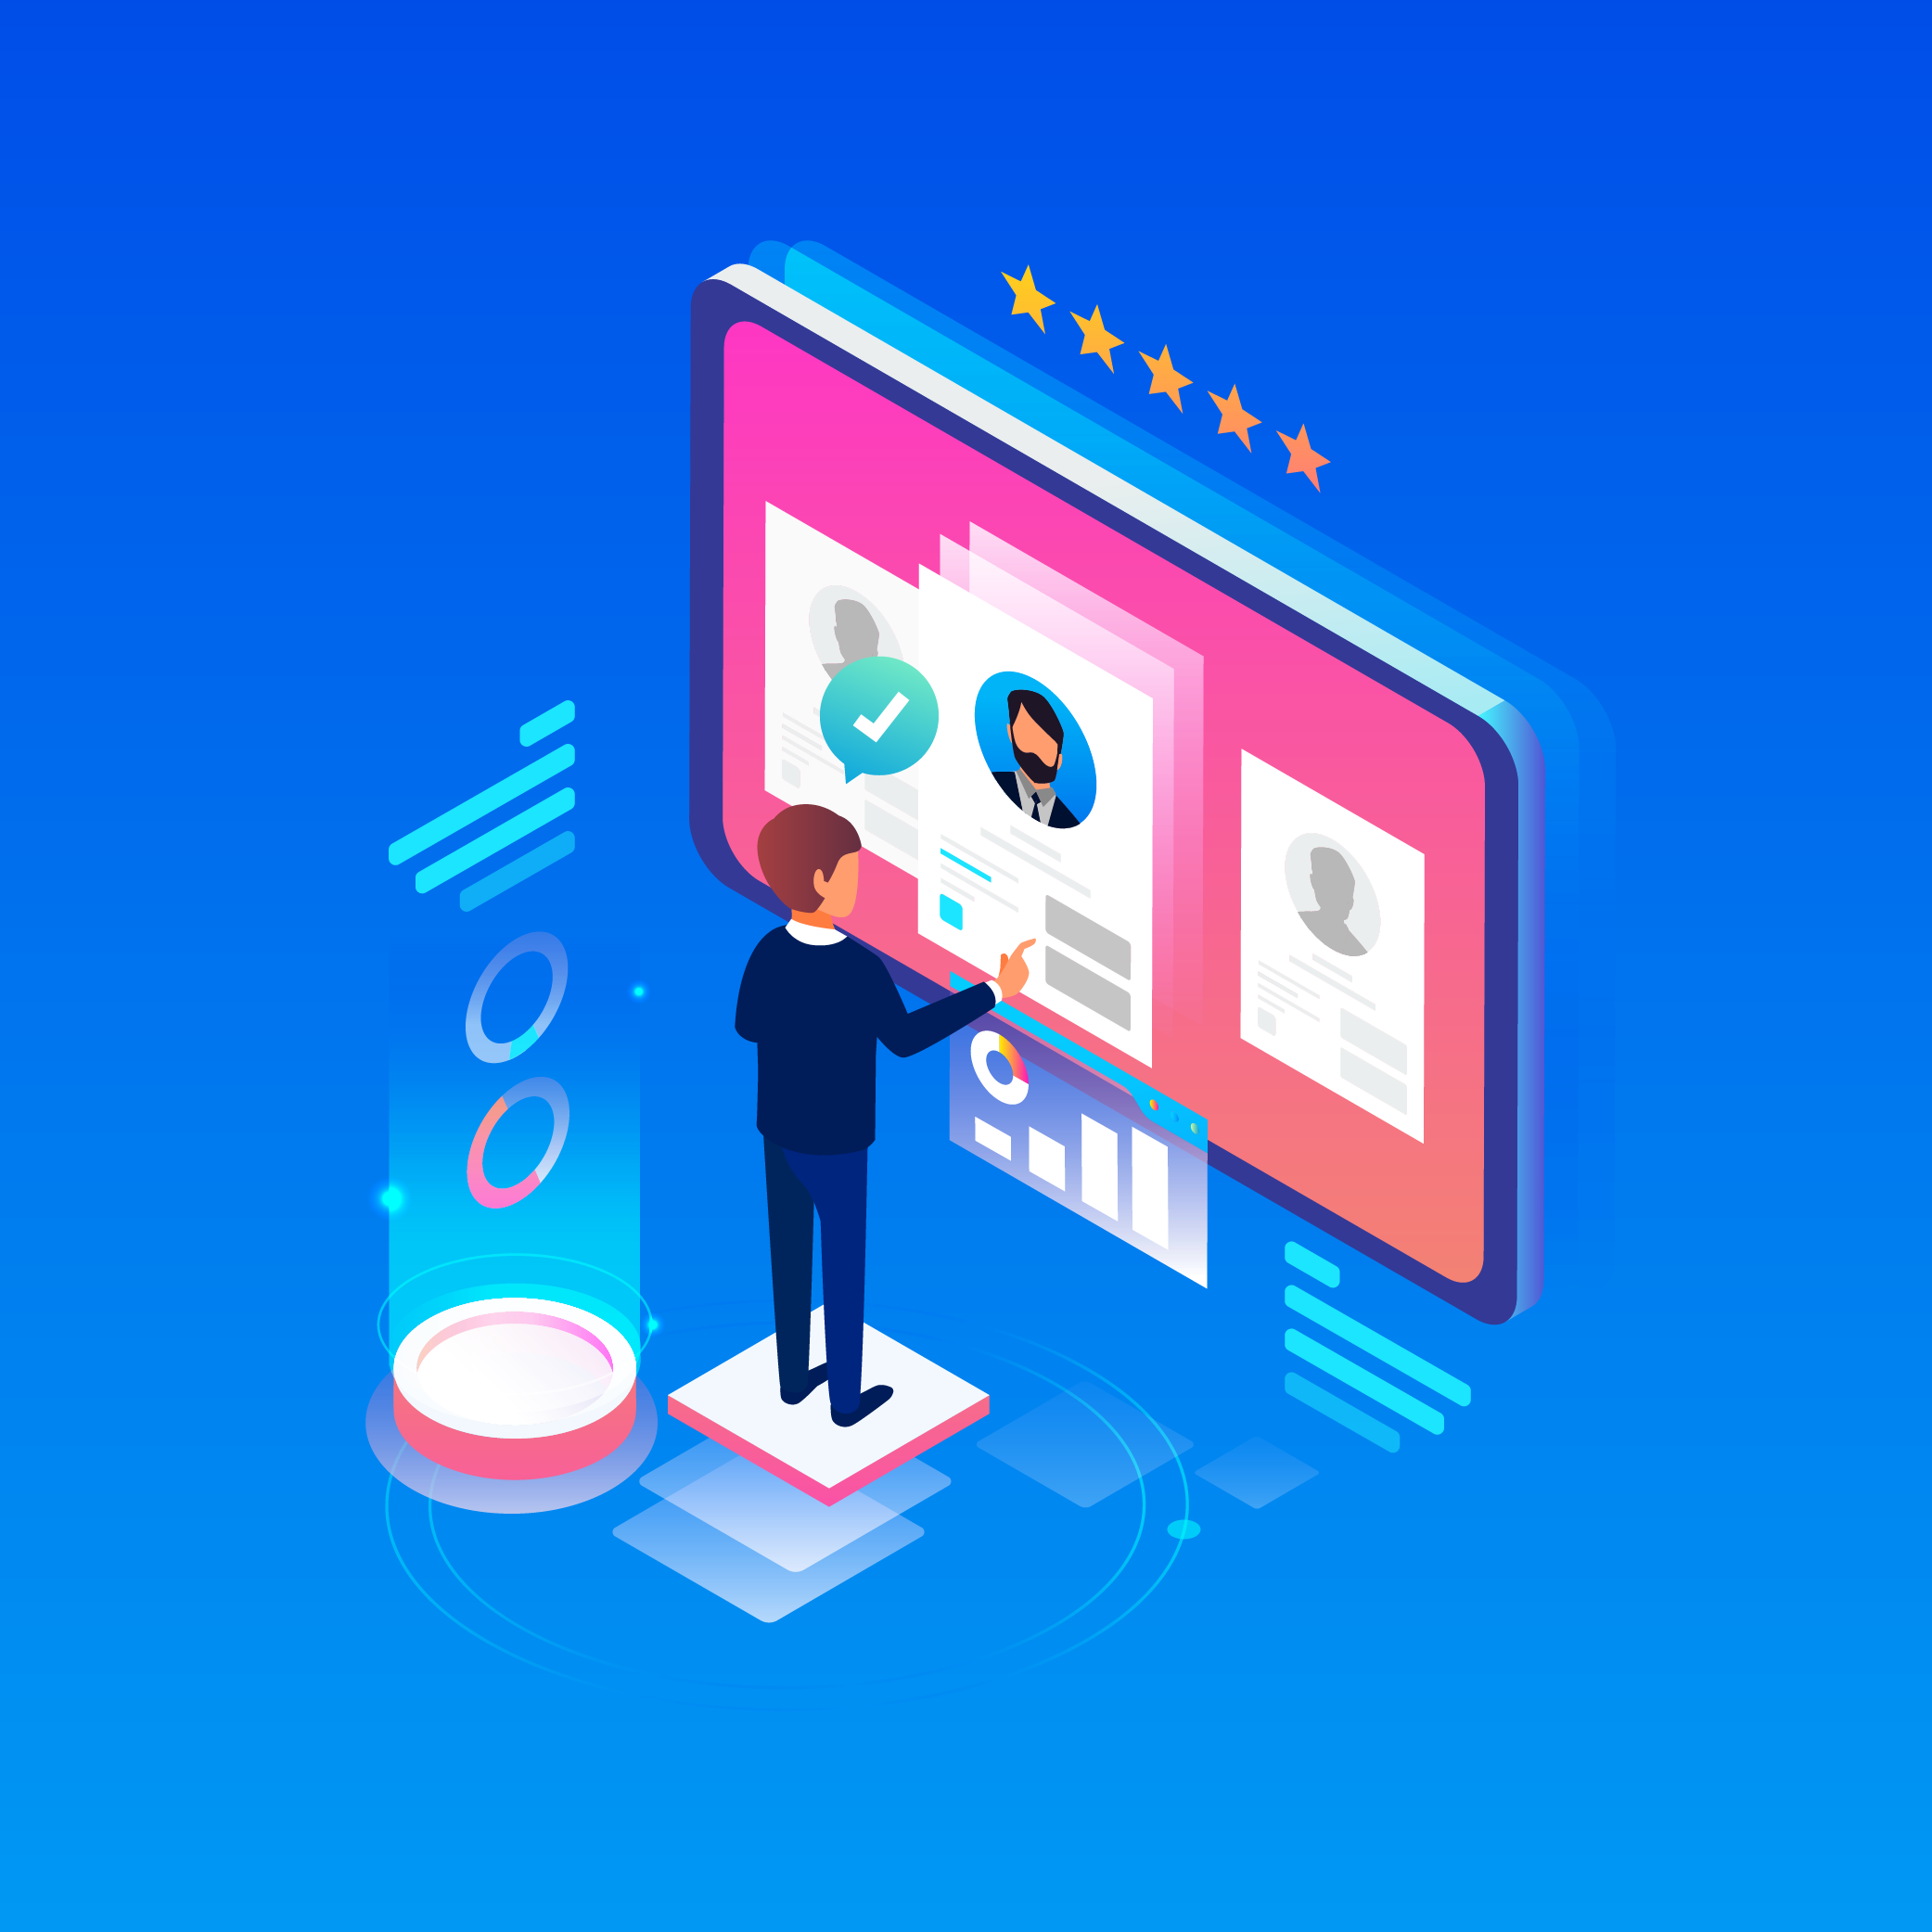

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : small; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Table of Contents</h1>
<br>

* [Importing Python Libraries](#section-zero)
* [Working with Data](#section-one)
    - [Reading the Data](#subsection-one)
    - [Data Visualizations](#subsection-two)
* [Feature Selection](#section-two)
    - [Fitting the Model](#subsection-three)
    - [Model Selection](#subsection-four)
    - [Predictions](#subsection-five)
    - [Accuracy of Model](#subsection-six)

<a id="section-zero"></a>
<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Importing Python Libraries</h1>
<br>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

<a id="section-one"></a>
<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Working with the Data</h1>
<br>

<a id="subsection-one"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : small; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Reading and Analyzing the Files</h1>
<br>

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s3e19/train.csv')
train['date'] = pd.to_datetime(train['date'])

In [5]:
train.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [6]:
train.shape

(136950, 6)

In [7]:
submission = pd.read_csv('/kaggle/input/playground-series-s3e19/sample_submission.csv')

In [8]:
test=pd.read_csv('/kaggle/input/playground-series-s3e19/test.csv')
test['date']=pd.to_datetime(test['date'])

In [9]:
test.head()

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [10]:
test.shape

(27375, 5)

In [11]:
train['country'].value_counts()

Argentina    27390
Canada       27390
Estonia      27390
Japan        27390
Spain        27390
Name: country, dtype: int64

In [12]:
train

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


<a id="subsection-two"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;"> Data Visualizations </h1>
<br>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Using LLMs to Improve Your Coding'),
  Text(1, 0, 'Using LLMs to Train More LLMs'),
  Text(2, 0, 'Using LLMs to Win Friends and Influence People'),
  Text(3, 0, 'Using LLMs to Win More Kaggle Competitions'),
  Text(4, 0, 'Using LLMs to Write Better')])

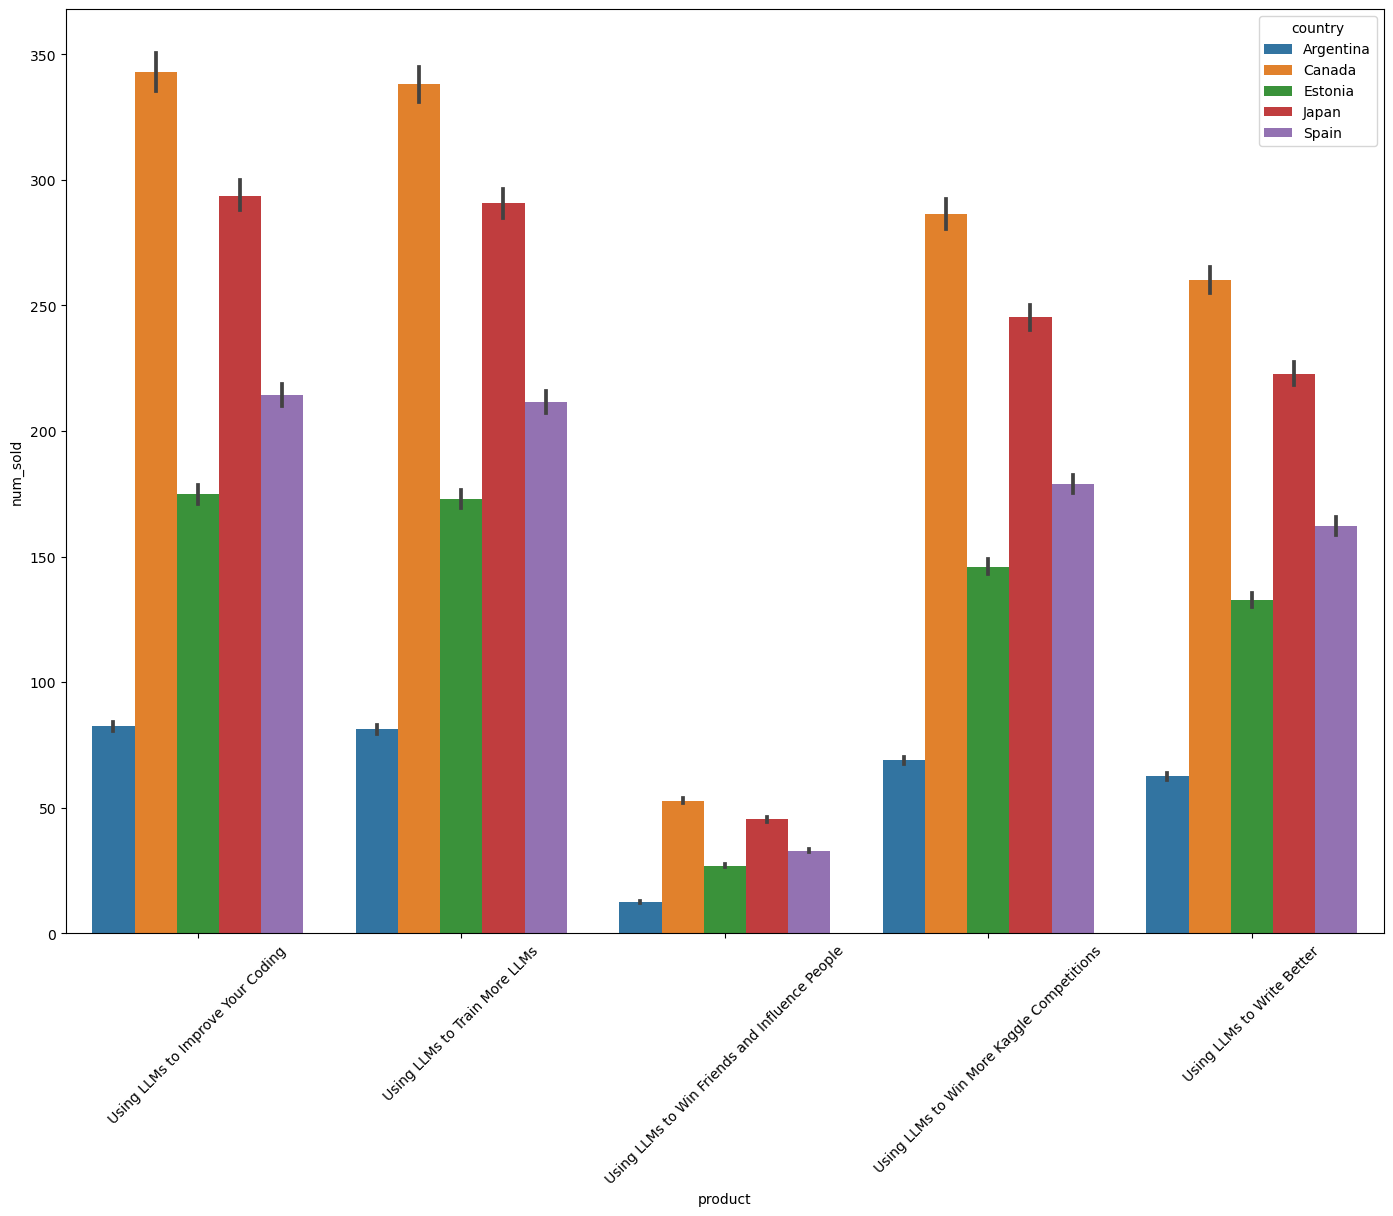

In [13]:
plt.figure(figsize=(17,12))
sns.barplot(data=train, x='product', y='num_sold', hue='country')
plt.xticks(rotation=45)

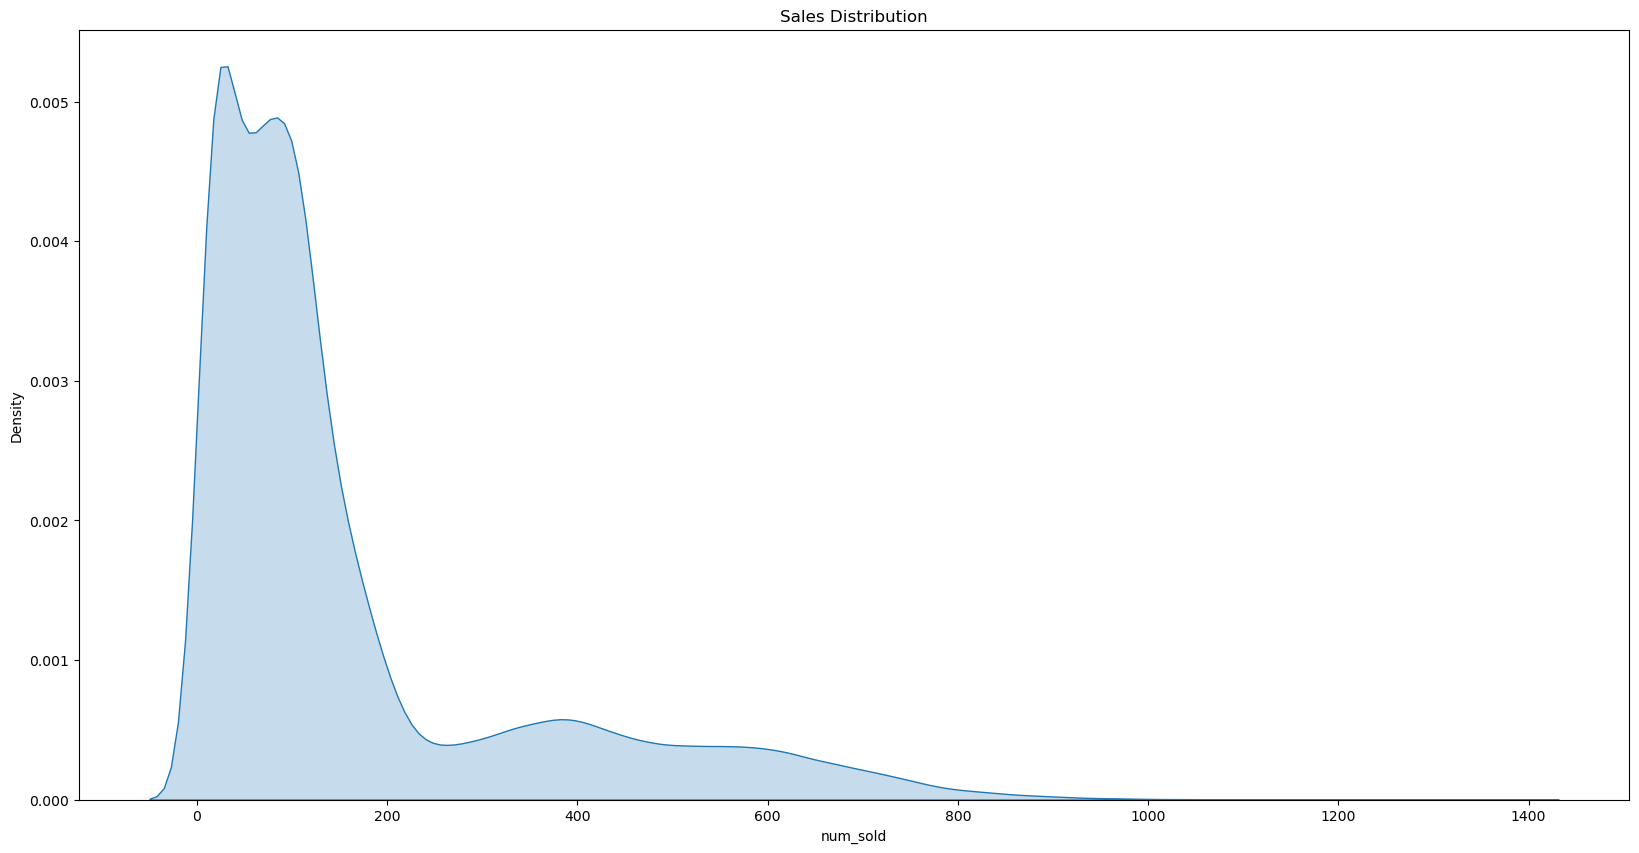

In [14]:
plt.figure(figsize = (20, 10))

sns.kdeplot(data = train, x = 'num_sold', fill = True)
    
plt.title('Sales Distribution')
plt.show()

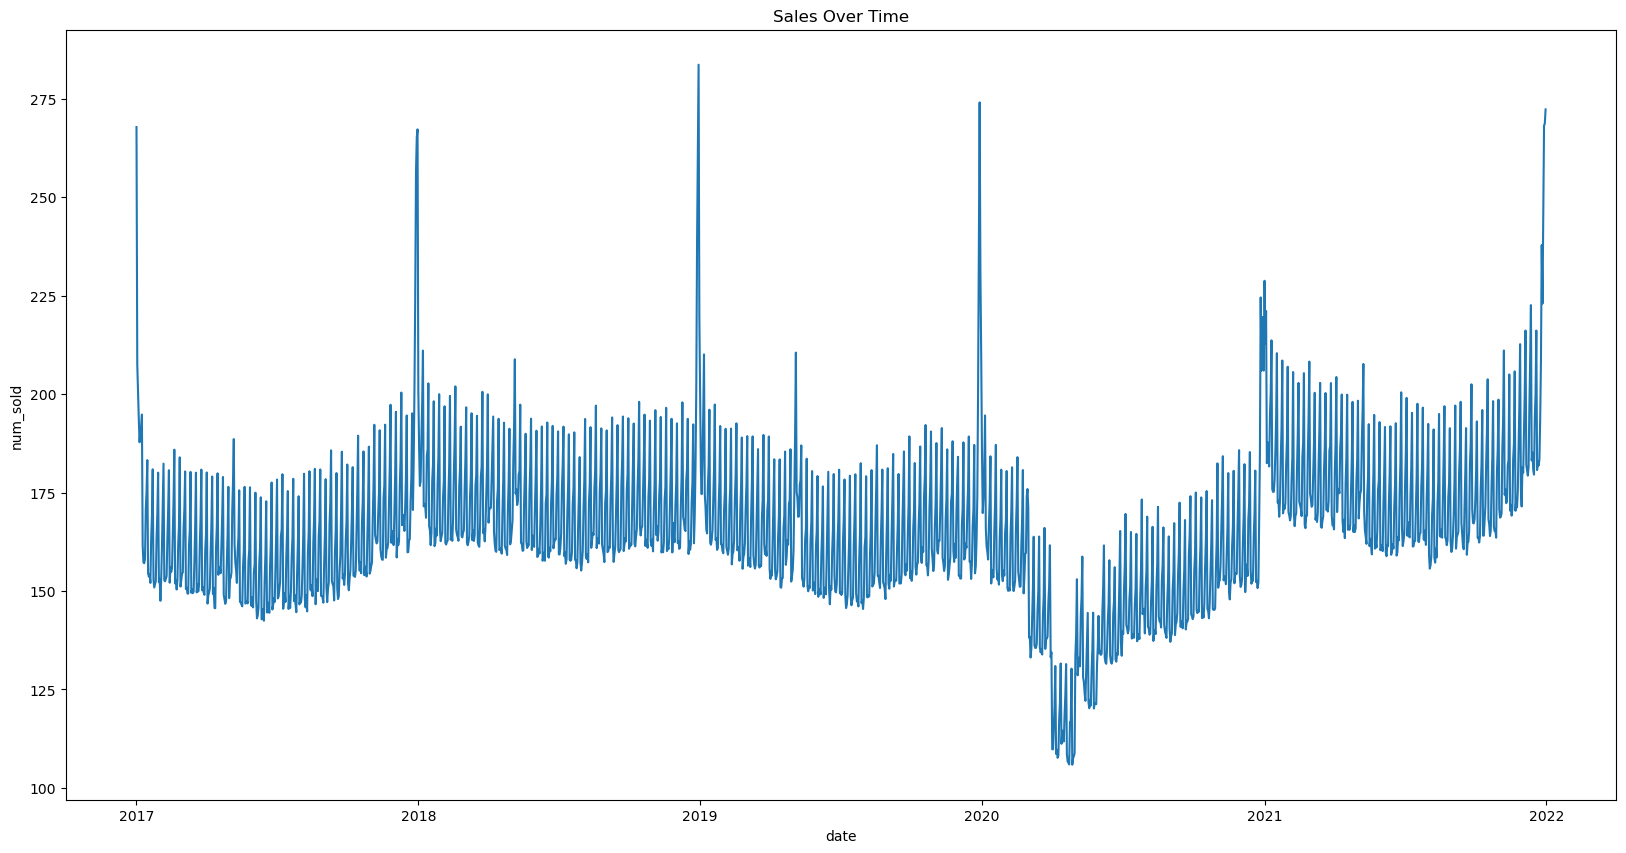

In [15]:
plt.figure(figsize = (20, 10))

sns.lineplot(data = train, x = 'date', y = 'num_sold', errorbar = None)
    
plt.title('Sales Over Time')
plt.show()

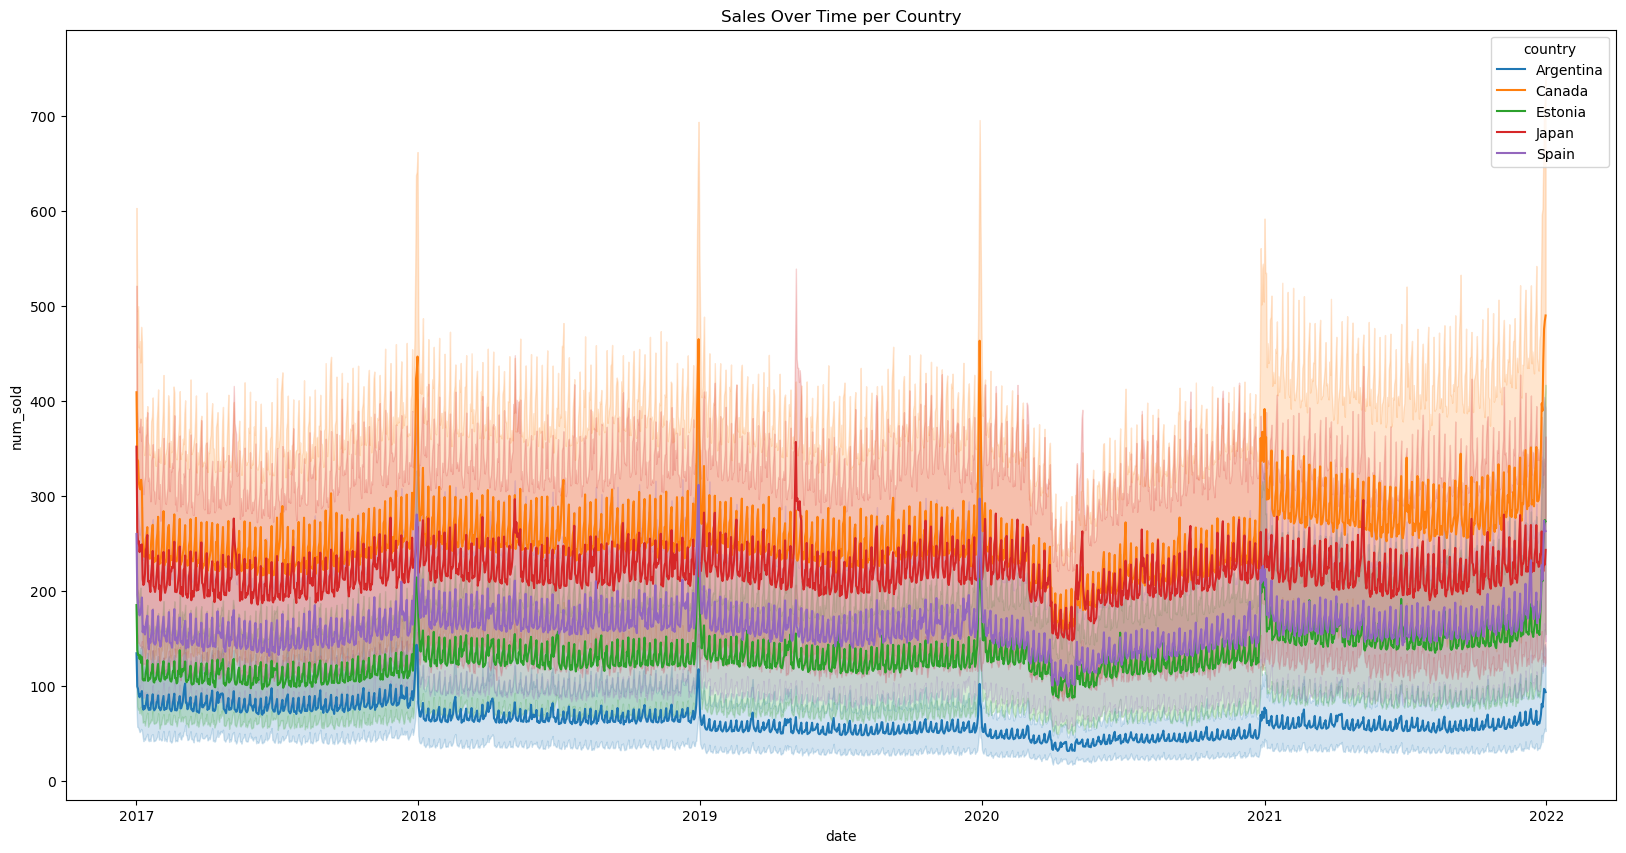

In [16]:
plt.figure(figsize = (20, 10))

sns.lineplot(data = train, x = 'date', y = 'num_sold', hue = 'country')
    
plt.title('Sales Over Time per Country')
plt.show()

<a id="section-two"></a>
<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Feature Selection</h1>
<br>

In [17]:
def format_date(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayOfYear'] = df['date'].dt.dayofyear
    df['weekday'] = df['date'].dt.weekday
    return df

train = format_date(train)
test = format_date(test)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['country', 'store', 'product']
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

<a id="subsection-three"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Model Fitting</h1>
<br>

In [19]:
train.drop('date', axis = 1, inplace = True)

In [20]:
train.drop('id', axis = 1, inplace = True)

In [21]:
test.drop('id', axis = 1, inplace = True)
test.drop('date', axis = 1, inplace = True)

In [22]:
df = pd.concat([train.drop('num_sold', axis = 1), test], axis = 0)
df.shape

(164325, 8)

Credit: https://www.kaggle.com/code/manishkumar7432698/ps3e19-starting-with-eda-plotly#Helper-Function

In [23]:
X = df.iloc[:train.shape[0], :]
y = train['num_sold']
X_test = df.iloc[train.shape[0]:,:]
X.shape, y.shape, X_test.shape

((136950, 8), (136950,), (27375, 8))

In [24]:
X_train = df[df.year<2021]
X_val = df[df.year==2021]
y_train = y[:X_train.shape[0]]
y_val = y[X_train.shape[0]:]
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((109575, 8), (27375, 8), (109575,), (27375,))

<a id="subsection-four"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Model Selection & Checking Validation Scores</h1>
<br>

In [25]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [26]:
from sklearn.ensemble import (GradientBoostingRegressor,RandomForestRegressor, AdaBoostRegressor)
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [27]:
models = {
    "DT":DecisionTreeRegressor(),
    "XGBoost" : XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose = False),
    "LightGBM": LGBMRegressor(),
    "RFC":RandomForestRegressor(),
    "gbc":GradientBoostingRegressor(),
    "abc":AdaBoostRegressor(),
    "KNN": KNeighborsRegressor(),
}

In [28]:
def smape(y_test, y_pred):
        y_test = list(y_test.values)
        y_pred = list(y_pred)

        sum_of_resudials = 0.0

        for index in range(0, len(y_test)):
            numerator = np.abs(y_pred[index] - y_test[index])
            denominator = (np.abs(y_test[index]) + np.abs(y_pred[index])) / 2

            sum_of_resudials += numerator / denominator

        return (sum_of_resudials / len(y_test))*100


In [29]:
def train_regressor(model, X_train, y_train, X_val, y_val, name = ""):
    print(f'Validation Score with {name}:')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    val_score = smape(y_val, y_pred)
    if val_score<60:
        print('Performing Well')
    else:
        print('Not Performing well')
    print(f'Model Score : {val_score}')
    print('='*90)

In [30]:
for i in range(len(models)):
    name = list(models.keys())[i]
    model = list(models.values())[i]
    
    train_regressor(model, X_train, y_train, X_val, y_val, name = name)

Validation Score with DT:
Performing Well
Model Score : 20.906957120056482
Validation Score with XGBoost:
Performing Well
Model Score : 22.47713345765674
Validation Score with CatBoost:
Performing Well
Model Score : 23.211026894923343
Validation Score with LightGBM:
Performing Well
Model Score : 23.449590008357944
Validation Score with RFC:
Performing Well
Model Score : 20.523337583339913
Validation Score with gbc:
Performing Well
Model Score : 39.088434591044795
Validation Score with abc:
Not Performing well
Model Score : 60.22930514735205
Validation Score with KNN:
Performing Well
Model Score : 49.17859811347151


<a id="subsection-five"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Inferring the Predictions</h1>
<br>

In [31]:
def submit_file(model, filename = 'submission.csv'):
    submission['num_sold'] = model.predict(X_test)
    submission.to_csv(filename, index = False)
    print(f'Your file submitted successfully with name {filename}')

<a id="subsection-six"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff9603; text-align: center; border-radius: 120px 120px;">Final Submission & Accuracy Check</h1>
<br>

In [32]:
model = RandomForestRegressor(random_state = 42)
train_regressor(model, X, y, X_val, y_val, name = "Random Forest")
submit_file(model, filename = 'submission.csv')

Validation Score with Random Forest:
Performing Well
Model Score : 1.9036893186557324
Your file submitted successfully with name submission.csv
